In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
dat_dir = '/dcs04/lieber/marmaypag/spatialNac_LIBD4125/spatial_NAc/processed-data/22_gene_risk_LR_analysis/raw-data/'
file_name = dat_dir + 'Substance_dependence-MONDO_0004938-associated-targets-7_21_2025-v25_06.tsv'
dis = pd.read_csv(file_name, delimiter = '\t')    
disease = 'Substance_dependence'

In [3]:
dis['gwasCredibleSets'] = dis['gwasCredibleSets'].replace('No data', '0').astype('float64')
dis['geneBurden'] = dis['gwasCredibleSets'].replace('No data', '0').astype('float64')
dis['eva'] = dis['eva'].replace('No data', '0').astype('float64')
dis['genomicsEngland'] = dis['genomicsEngland'].replace('No data', '0').astype('float64')
dis['gene2Phenotype'] = dis['gene2Phenotype'].replace('No data', '0').astype('float64')
dis['uniprotLiterature'] = dis['uniprotLiterature'].replace('No data', '0').astype('float64')
dis['uniprotVariants'] = dis['uniprotVariants'].replace('No data', '0').astype('float64')
dis['orphanet'] = dis['orphanet'].replace('No data', '0').astype('float64')
dis['clingen'] = dis['clingen'].replace('No data', '0').astype('float64')

numeric_cols = [
    'gwasCredibleSets', 'geneBurden', 'eva', 'genomicsEngland',
    'gene2Phenotype', 'uniprotLiterature', 'uniprotVariants',
    'orphanet', 'clingen'
]

# Create a new column with the row-wise max
dis['max_genetic_evidence_score'] = dis[numeric_cols].max(axis=1)

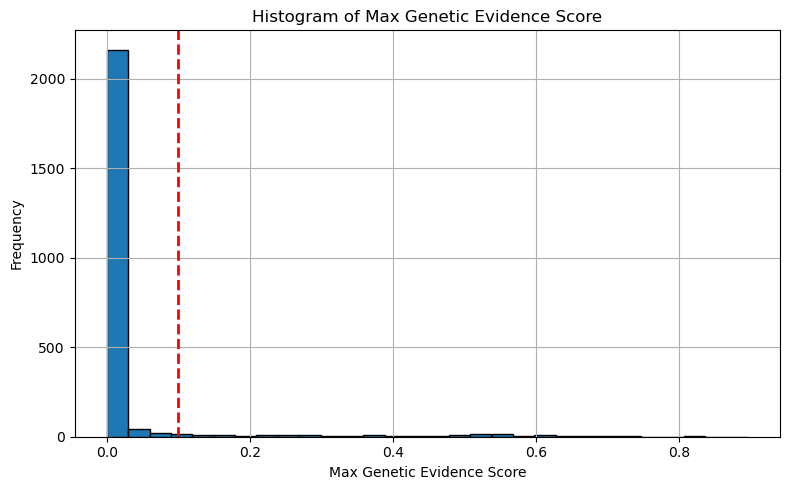

In [4]:
plt.figure(figsize=(8, 5))
plt.hist(dis['max_genetic_evidence_score'], bins=30, edgecolor='black')
plt.axvline(x=0.1, color='red', linestyle='--', linewidth=2, label='Threshold = 0.1')
plt.title('Histogram of Max Genetic Evidence Score')
plt.xlabel('Max Genetic Evidence Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
dis = dis[['symbol', 'max_genetic_evidence_score']]
dis.rename(columns={'max_genetic_evidence_score': 'genetic_association'}, inplace = True)
print("Number of genes with an association > 0.1")
print(sum(dis['genetic_association'] > 0.1))
dis = dis[dis['genetic_association']>0.1]
print(np.shape(dis))

Number of genes with an association > 0.1
154
(154, 2)


In [6]:
if np.shape(dis)[0]>10:
    genetic_association = dis.set_index('symbol')
    genetic_association.to_csv('/dcs04/lieber/marmaypag/spatialNac_LIBD4125/spatial_NAc/processed-data/22_gene_risk_LR_analysis/02-OpenTarget_risk_genes/Substance_dependence_risk_genes_01thr.csv')
    
    dis['score']=int(1)
    dis = dis.drop(columns=['genetic_association']).set_index(['symbol'])
    #creating instance of one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder_df = pd.DataFrame(encoder.fit_transform(dis).toarray())
    encoder_df[disease] = encoder_df[0]
    encoder_df = encoder_df.drop(columns=[0])
    encoder_df['genes'] = list(dis.index)
    encoder_df.set_index('genes', inplace=True)
    encoder_df.to_csv('/dcs04/lieber/marmaypag/spatialNac_LIBD4125/spatial_NAc/processed-data/22_gene_risk_LR_analysis/02-OpenTarget_risk_genes/Substance_dependence_risk_genes_01thr_hot1.csv')
    print(encoder_df)
else:
    print("Disease doesn't have enough genes with high genetic scores.")

          Substance_dependence
genes                         
CHRNA4                     1.0
OPRM1                      1.0
GABRA2                     1.0
SLC6A3                     1.0
CHRNB2                     1.0
...                        ...
AMT                        1.0
RPGRIP1L                   1.0
TMEM86A                    1.0
SELENOH                    1.0
TMX2                       1.0

[154 rows x 1 columns]
